In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px


In [2]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/data/Country wise global population 2022.csv')



In [5]:
data.head()

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00


In [6]:
data.head(201)

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
196,Vietnam,97338579,0.91,876473,314,310070,-80000,2.1,32,38.0,1.25
197,Western Sahara,597339,2.55,14876,2,266000,5582,2.4,28,87.0,0.01
198,Yemen,29825964,2.28,664042,56,527970,-30000,3.8,20,38.0,0.38
199,Zambia,18383955,2.93,522925,25,743390,-8000,4.7,18,45.0,0.24


In [7]:
data.shape

(201, 11)

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country/Other      201 non-null    object 
 1   Population (2020)  201 non-null    int64  
 2   Yearly Change      201 non-null    float64
 3   Net Change         201 non-null    int64  
 4   Density (P/Km²)    201 non-null    int64  
 5   Land Area (Km²)    201 non-null    int64  
 6   Migrants (net)     201 non-null    int64  
 7   Fert. Rate         201 non-null    float64
 8   Med. Age           201 non-null    int64  
 9   Urban Pop %        194 non-null    float64
 10  World Share        201 non-null    float64
dtypes: float64(4), int64(6), object(1)
memory usage: 17.4+ KB


In [9]:
data.columns

Index(['Country/Other', 'Population (2020)', 'Yearly Change', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate',
       'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

In [10]:
data.describe()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,2.010000e+02,201.000000,2.010000e+02,201.000000,2.010000e+02,201.000000,201.000000,201.000000,194.000000,201.000000
mean,3.877661e+07,1.200299,4.046234e+05,361.711443,6.450903e+05,-5.442786,2.692040,30.621891,59.634021,0.497463
std,1.454245e+08,1.091574,1.210610e+06,1710.321831,1.809408e+06,123292.057588,1.264253,9.119557,22.226695,1.865678
min,9.792900e+04,-2.470000,-3.838400e+05,2.000000,3.000000e+01,-653249.000000,1.100000,15.000000,13.000000,0.000000
25%,1.886198e+06,0.420000,4.103000e+03,34.000000,2.164000e+04,-10047.000000,1.700000,22.000000,43.000000,0.020000
50%,8.654622e+06,1.080000,6.040300e+04,89.000000,1.085600e+05,-960.000000,2.300000,30.000000,60.000000,0.110000
75%,2.769102e+07,1.960000,3.602040e+05,228.000000,4.988000e+05,9741.000000,3.600000,39.000000,78.750000,0.360000
max,1.439324e+09,3.840000,1.358663e+07,21645.000000,1.637687e+07,954806.000000,7.000000,48.000000,100.000000,18.470000


In [11]:
data.isnull().sum()

Country/Other        0
Population (2020)    0
Yearly Change        0
Net Change           0
Density (P/Km²)      0
Land Area (Km²)      0
Migrants (net)       0
Fert. Rate           0
Med. Age             0
Urban Pop %          7
World Share          0
dtype: int64

In [12]:
data.head()

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00


In [13]:
data.tail()

,Country/Other,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
196,Vietnam,97338579,0.91,876473,314,310070,-80000,2.1,32,38.0,1.25
197,Western Sahara,597339,2.55,14876,2,266000,5582,2.4,28,87.0,0.01
198,Yemen,29825964,2.28,664042,56,527970,-30000,3.8,20,38.0,0.38
199,Zambia,18383955,2.93,522925,25,743390,-8000,4.7,18,45.0,0.24
200,Zimbabwe,14862924,1.48,217456,38,386850,-116858,3.6,19,38.0,0.19


In [14]:
#changing column names
data.rename(columns = {'Density (P/Km²)':'Density'},inplace=True)

In [15]:
data.rename(columns = {'Land Area (Km²)':'Land Area'},inplace=True)

In [16]:
data.rename(columns = {'Country/Other':'Country'}, inplace = True)

In [17]:
data.rename(columns = {'Population (2020)':'Population'}, inplace = True)

In [18]:
data.head()

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Albania,2877797,-0.11,-3120,105,27400,-14000,1.6,36,63.0,0.04
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
4,Antigua and Barbuda,97929,0.84,811,223,440,0,2.0,34,26.0,0.00


Visualizations:

Top 10 countries of all categories

In [21]:
#population
data.nlargest(n=10, columns=['Population'])


,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
36,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
82,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25
83,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0,3.51
136,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83
23,Brazil,212559417,0.72,1509890,25,8358140,21200,1.7,33,88.0,2.73
131,Nigeria,206139589,2.58,5175990,226,910770,-60000,5.4,18,52.0,2.64
13,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11
147,Russia,145934462,0.04,62206,9,16376870,182456,1.8,40,74.0,1.87
116,Mexico,128932753,1.06,1357224,66,1943950,-60000,2.1,29,84.0,1.65


In [20]:
#Yearly Change
data.nlargest(n=10, columns=['Yearly Change'])


,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
130,Niger,24206644,3.84,895929,19,1266700,4000,7.0,15,17.0,0.31
12,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02
54,Equatorial Guinea,1402985,3.47,46999,50,28050,16000,4.6,22,73.0,0.02
187,Uganda,45741007,3.32,1471413,229,199810,168694,5.0,17,26.0,0.59
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
47,DR Congo,89561403,3.19,2770836,40,2267050,23861,6.0,17,46.0,1.15
27,Burundi,11890784,3.12,360204,463,25680,2001,5.5,17,14.0,0.15
110,Mali,20250833,3.02,592802,17,1220190,-40000,5.9,16,44.0,0.26
33,Chad,16425864,3.00,478988,13,1259200,2000,5.8,17,23.0,0.21
177,Tanzania,59734218,2.98,1728755,67,885800,-40076,4.9,18,37.0,0.77


In [22]:
#Net Change
data.nlargest(n=10, columns=['Net Change'])

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
82,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70
36,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
131,Nigeria,206139589,2.58,5175990,226,910770,-60000,5.4,18,52.0,2.64
136,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83
83,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0,3.51
58,Ethiopia,114963588,2.57,2884858,115,1000000,30000,4.3,19,21.0,1.47
47,DR Congo,89561403,3.19,2770836,40,2267050,23861,6.0,17,46.0,1.15
52,Egypt,102334404,1.94,1946331,103,995450,-38033,3.3,25,43.0,1.31
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25
177,Tanzania,59734218,2.98,1728755,67,885800,-40076,4.9,18,37.0,0.77


In [23]:
#Density
data.nlargest(n=10, columns=['Density'])

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
105,Macao,649335,1.39,8890,21645,30,5000,1.2,39,NaN,0.01
158,Singapore,5850342,0.79,46005,8358,700,27028,1.2,42,NaN,0.08
79,Hong Kong,7496981,0.82,60827,7140,1050,29308,1.3,45,NaN,0.10
12,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02
109,Maldives,540544,1.81,9591,1802,300,11370,1.9,30,35.0,0.01
111,Malta,441543,0.27,1171,1380,320,900,1.5,43,93.0,0.01
13,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11
34,Channel Islands,173863,0.93,1604,915,190,1351,1.5,43,30.0,0.00
169,State of Palestine,5101414,2.41,119994,847,6020,-10563,3.7,21,80.0,0.07
117,Micronesia,548914,1.00,5428,784,700,-2957,2.9,27,68.0,0.01


In [24]:
#Land Area
data.nlargest(n=10, columns=['Land Area'])

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
147,Russia,145934462,0.04,62206,9,16376870,182456,1.8,40,74.0,1.87
36,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25
31,Canada,37742154,0.89,331107,4,9093510,242032,1.5,41,81.0,0.48
23,Brazil,212559417,0.72,1509890,25,8358140,21200,1.7,33,88.0,2.73
8,Australia,25499884,1.18,296686,3,7682300,158246,1.8,38,86.0,0.33
82,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70
5,Argentina,45195774,0.93,415097,17,2736690,4800,2.3,32,93.0,0.58
92,Kazakhstan,18776707,1.21,225280,7,2699700,-18000,2.8,31,58.0,0.24
2,Algeria,43851044,1.85,797990,18,2381740,-10000,3.1,29,73.0,0.56


In [25]:
#Migrants
data.nlargest(n=10, columns=['Migrants (net)'])

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25
67,Germany,83783942,0.32,266897,240,348560,543822,1.6,46,76.0,1.07
184,Turkey,84339067,1.09,909452,110,769630,283922,2.1,32,76.0,1.08
190,United Kingdom,67886011,0.53,355839,281,241930,260650,1.8,40,83.0,0.87
31,Canada,37742154,0.89,331107,4,9093510,242032,1.5,41,81.0,0.48
37,Colombia,50882891,1.08,543448,46,1109500,204796,1.8,31,80.0,0.65
147,Russia,145934462,0.04,62206,9,16376870,182456,1.8,40,74.0,1.87
187,Uganda,45741007,3.32,1471413,229,199810,168694,5.0,17,26.0,0.59
8,Australia,25499884,1.18,296686,3,7682300,158246,1.8,38,86.0,0.33
88,Italy,60461826,-0.15,-88249,206,294140,148943,1.3,47,69.0,0.78


In [26]:
#Fert.Rate
data.nlargest(n=10, columns=['Fert. Rate'])

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
130,Niger,24206644,3.84,895929,19,1266700,4000,7.0,15,17.0,0.31
162,Somalia,15893222,2.92,450317,25,627340,-40000,6.1,17,47.0,0.20
47,DR Congo,89561403,3.19,2770836,40,2267050,23861,6.0,17,46.0,1.15
110,Mali,20250833,3.02,592802,17,1220190,-40000,5.9,16,44.0,0.26
33,Chad,16425864,3.00,478988,13,1259200,2000,5.8,17,23.0,0.21
3,Angola,32866272,3.27,1040977,26,1246700,6413,5.6,17,67.0,0.42
27,Burundi,11890784,3.12,360204,463,25680,2001,5.5,17,14.0,0.15
131,Nigeria,206139589,2.58,5175990,226,910770,-60000,5.4,18,52.0,2.64
65,Gambia,2416668,2.94,68962,239,10120,-3087,5.3,18,59.0,0.03
26,Burkina Faso,20903273,2.86,581895,76,273600,-25000,5.2,18,31.0,0.27


In [27]:
#Med.Age
data.nlargest(n=10, columns=['Med. Age'])

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
90,Japan,126476461,-0.30,-383840,347,364555,71560,1.4,48,92.0,1.62
88,Italy,60461826,-0.15,-88249,206,294140,148943,1.3,47,69.0,0.78
112,Martinique,375265,-0.08,-289,354,1060,-960,1.9,47,92.0,0.00
67,Germany,83783942,0.32,266897,240,348560,543822,1.6,46,76.0,1.07
69,Greece,10423054,-0.48,-50401,81,128900,-16000,1.3,46,85.0,0.13
143,Portugal,10196709,-0.29,-29478,111,91590,-6000,1.3,46,66.0,0.13
25,Bulgaria,6948445,-0.74,-51674,64,108560,-4800,1.6,45,76.0,0.09
79,Hong Kong,7496981,0.82,60827,7140,1050,29308,1.3,45,NaN,0.10
103,Lithuania,2722289,-1.35,-37338,43,62674,-32780,1.7,45,71.0,0.03
160,Slovenia,2078938,0.01,284,103,20140,2000,1.6,45,55.0,0.03


In [28]:
#Urban Population
data.nlargest(n=10, columns=['Urban Pop %'])

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
149,Réunion,895312,0.72,6385,358,2500,-1256,2.3,36,100.0,0.01
16,Belgium,11589623,0.44,50295,383,30280,48000,1.7,42,98.0,0.15
145,Qatar,2881053,1.73,48986,248,11610,40000,1.9,32,96.0,0.04
186,U.S. Virgin Islands,104425,-0.15,-153,298,350,-451,2.0,43,96.0,0.00
192,Uruguay,3473730,0.35,11996,20,175020,-3000,2.0,36,96.0,0.04
72,Guam,168775,0.89,1481,313,540,-506,2.3,31,95.0,0.00
81,Iceland,341243,0.65,2212,3,100250,380,1.8,37,94.0,0.00
5,Argentina,45195774,0.93,415097,17,2736690,4800,2.3,32,93.0,0.58
87,Israel,8655535,1.60,136158,400,21640,10000,3.0,30,93.0,0.11
111,Malta,441543,0.27,1171,1380,320,900,1.5,43,93.0,0.01


In [29]:
#World Share
data.nlargest(n=10, columns=['World Share'])

,Country,Population,Yearly Change,Net Change,Density,Land Area,Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
36,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47
82,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70
191,United States,331002651,0.59,1937734,36,9147420,954806,1.8,38,83.0,4.25
83,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0,3.51
136,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83
23,Brazil,212559417,0.72,1509890,25,8358140,21200,1.7,33,88.0,2.73
131,Nigeria,206139589,2.58,5175990,226,910770,-60000,5.4,18,52.0,2.64
13,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11
147,Russia,145934462,0.04,62206,9,16376870,182456,1.8,40,74.0,1.87
116,Mexico,128932753,1.06,1357224,66,1943950,-60000,2.1,29,84.0,1.65


In [36]:
columns=['Population', 'Yearly Change', 'Net Change',
       'Density', 'Land Area', 'Migrants (net)', 'Fert. Rate',
       'Med. Age', 'Urban Pop %', 'World Share']

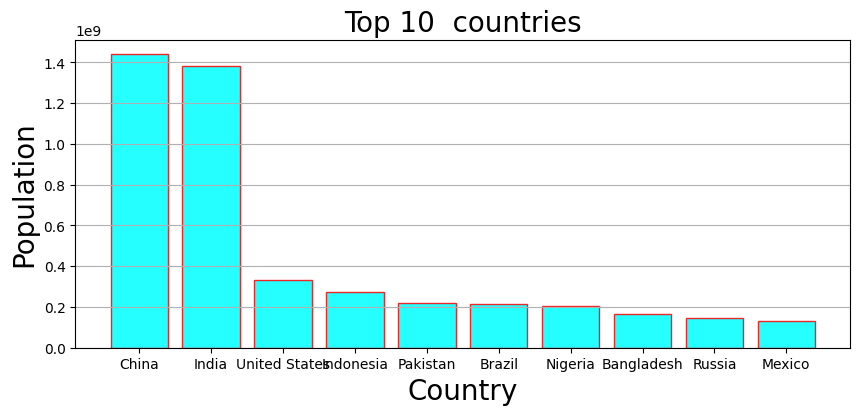

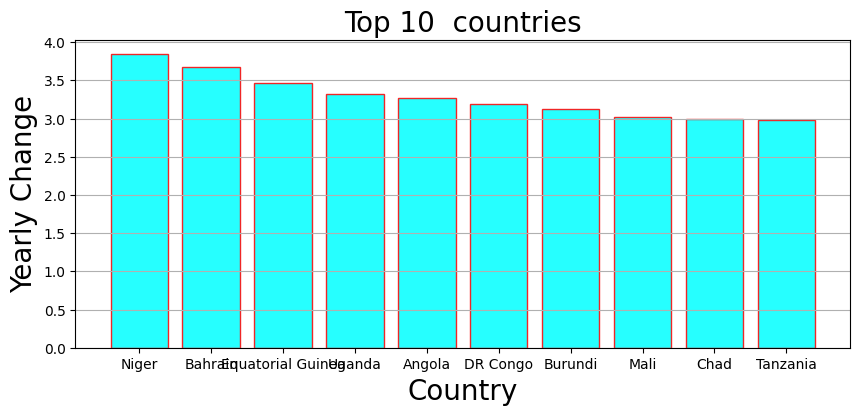

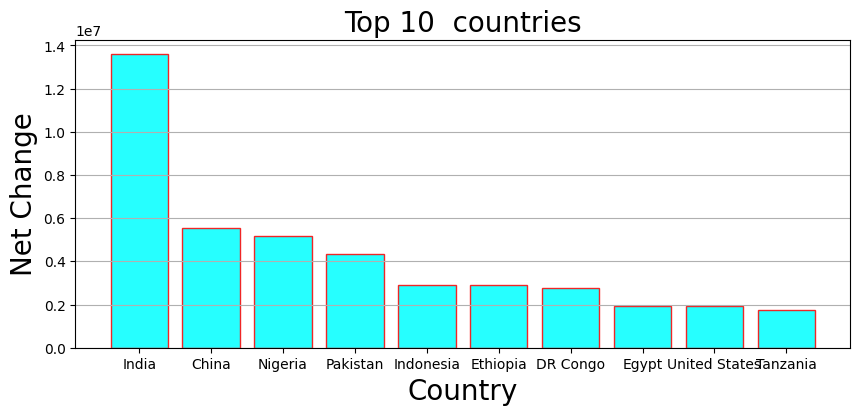

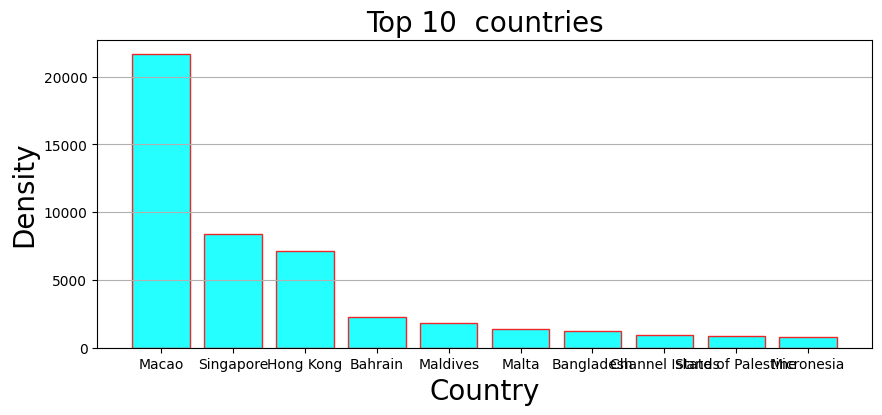

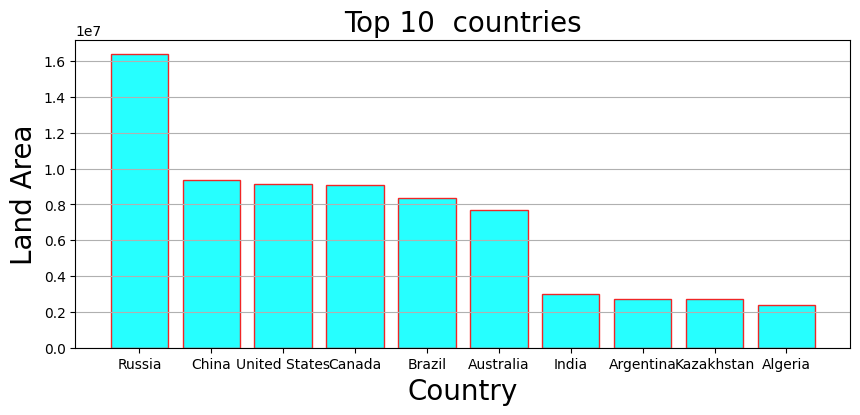

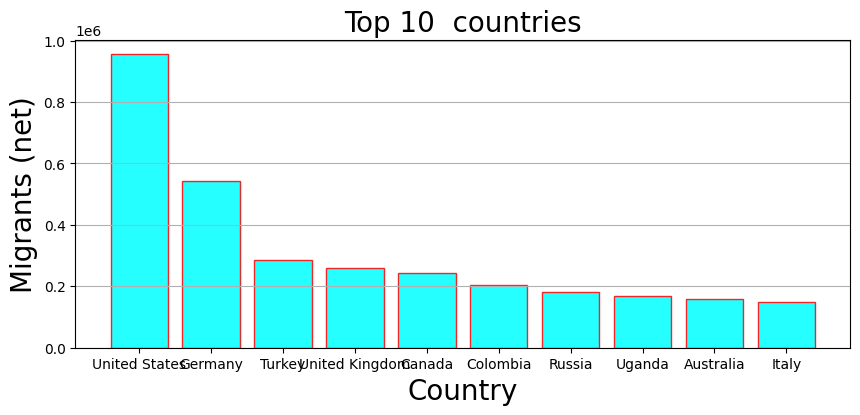

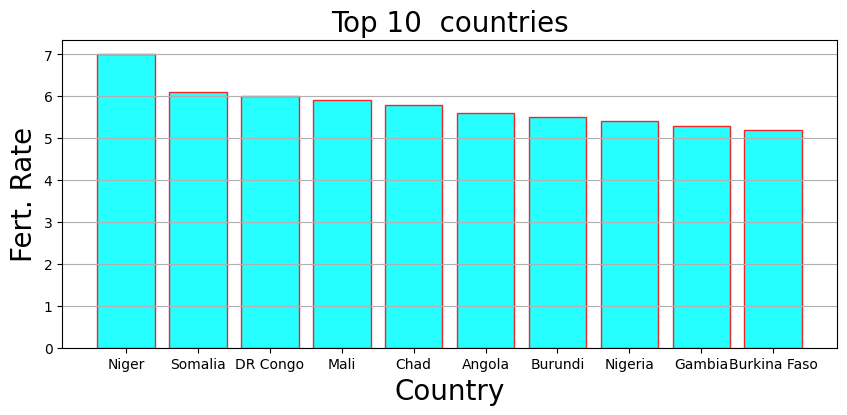

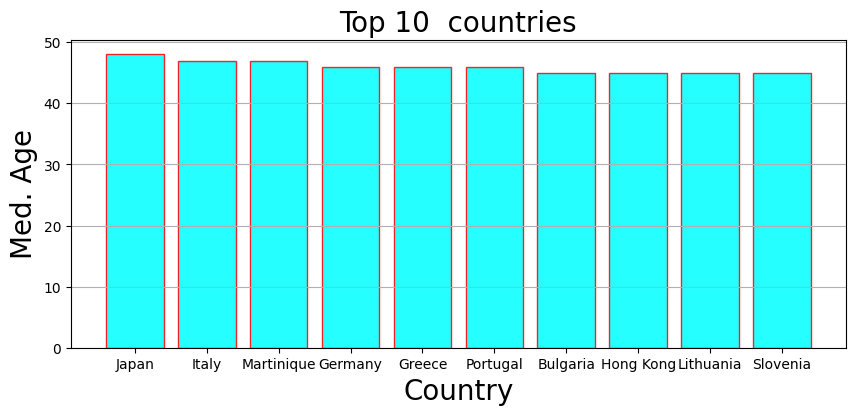

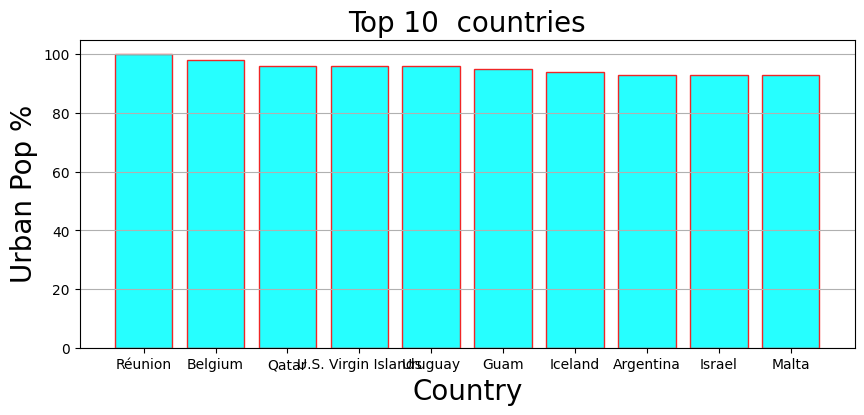

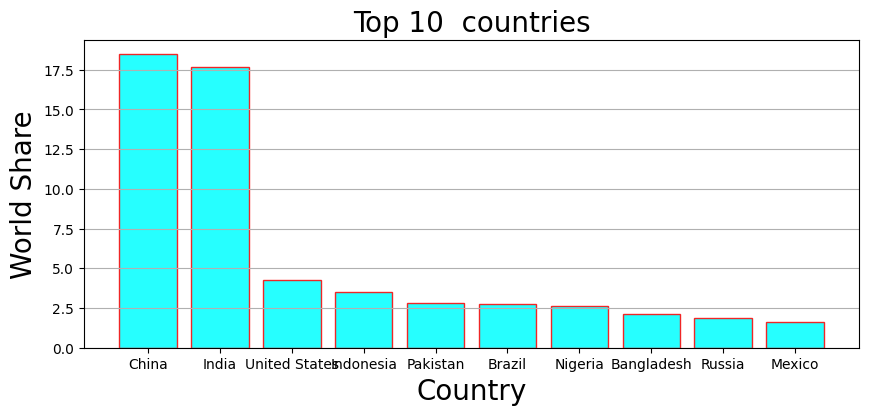

In [37]:
#Top 10 countries of all categories
for column in columns:
  top10 = data.nlargest(10,column)
  plt.figure(figsize=(10,4))
  plt.bar(top10['Country'], top10[column],color='cyan',alpha=0.85,edgecolor='red')
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("Top 10  countries", fontsize = 20)
  plt. grid(axis='y')


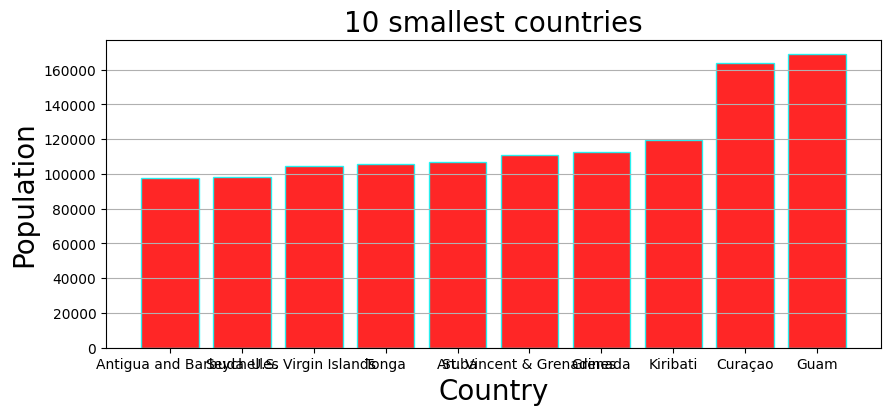

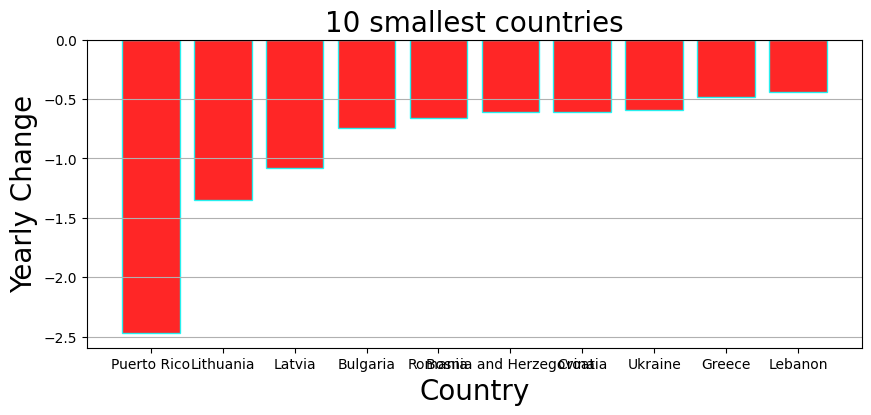

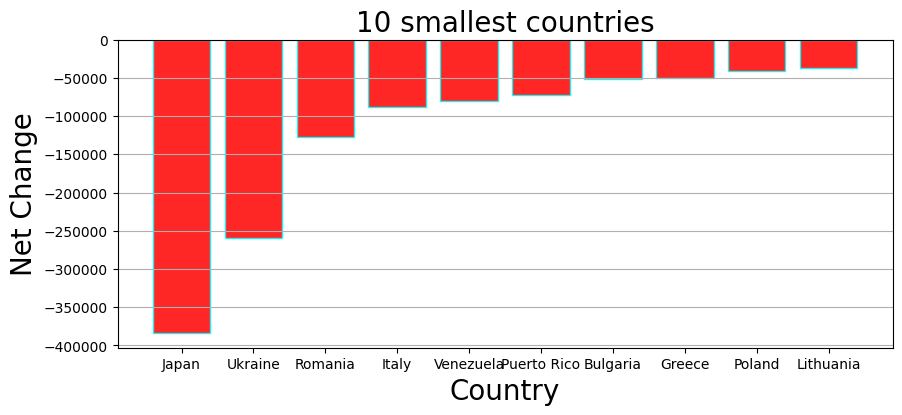

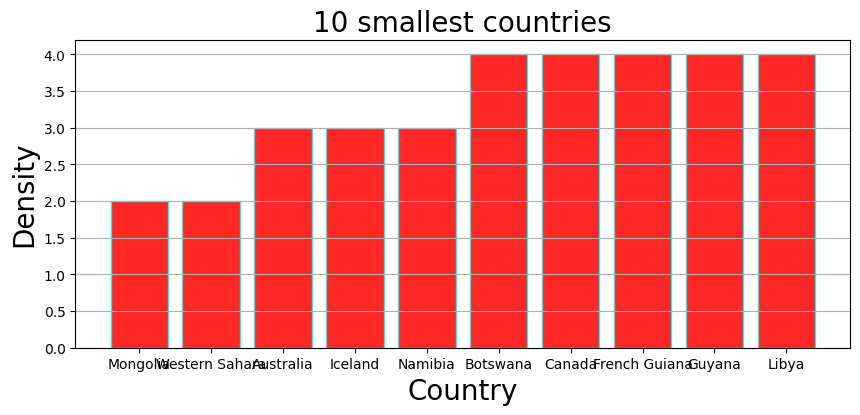

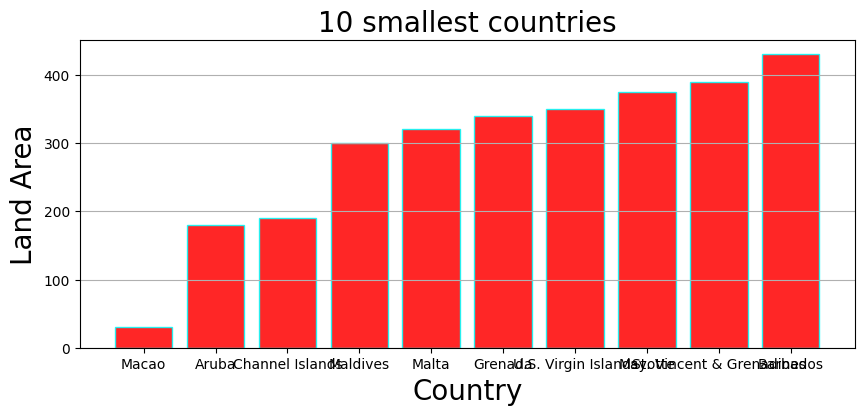

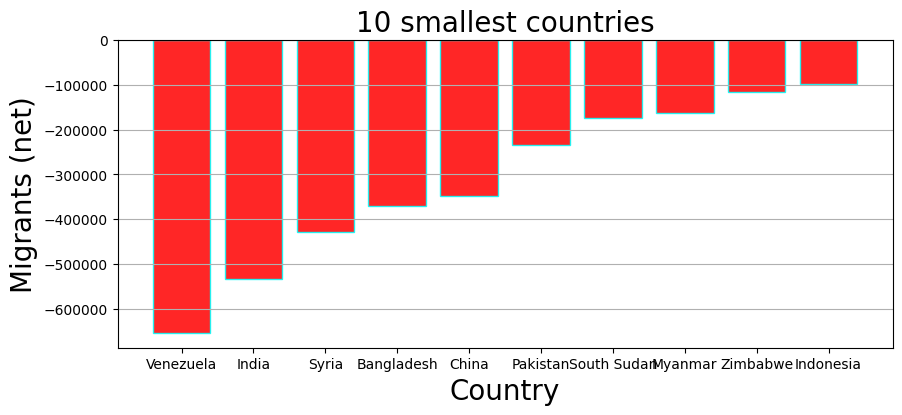

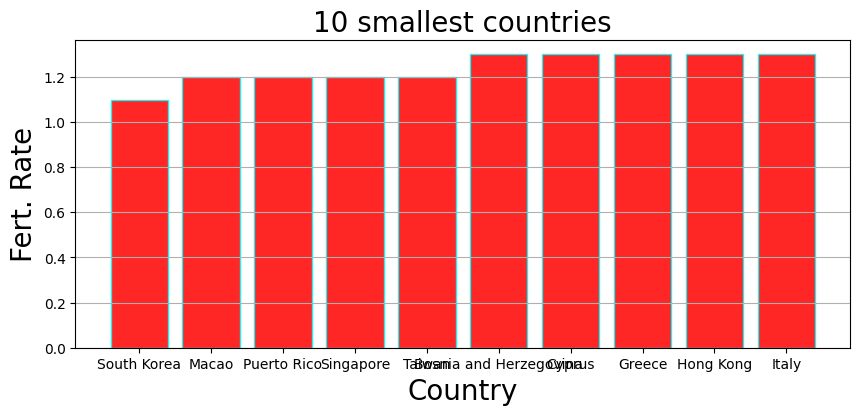

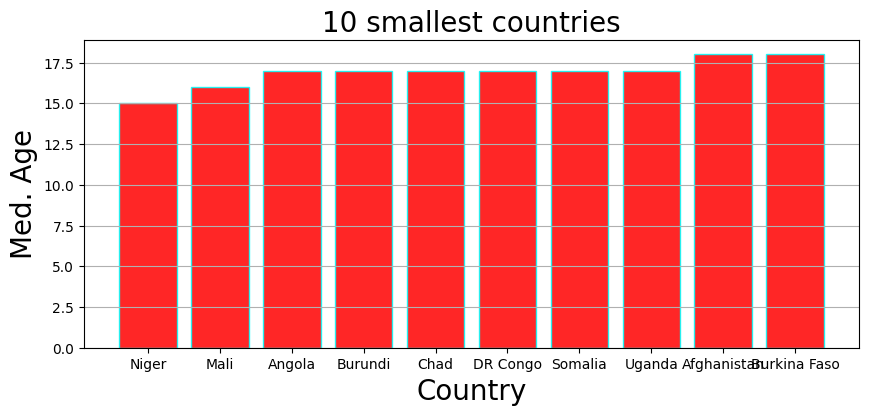

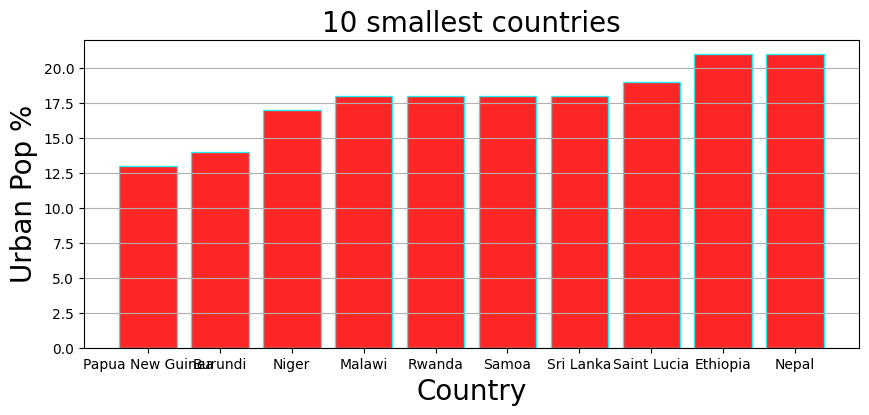

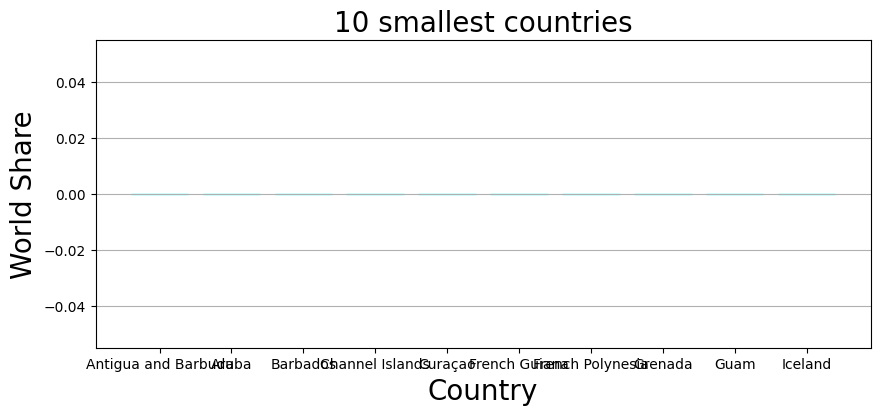

In [38]:
for column in columns:
  top10 = data.nsmallest(10,column)
  plt.figure(figsize=(10,4))
  plt.bar(top10['Country'], top10[column],color='red',alpha=0.85,edgecolor='cyan')
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("10 smallest countries", fontsize = 20)
  plt. grid(axis='y')


In [39]:
ds = []
for row in data['Density']:
        if row > 0 and row < 10 :    ds.append('Very Low')
        elif row >=10 and row < 50:   ds.append('Low')
        elif row >=50 and row < 100:  ds.append('Medium')
        elif row >=100 and row < 300:  ds.append('High')
        elif row >= 300:  ds.append('Very High')

        else:           ds.append('Not_Rated')

data['Density Status'] = ds


In [40]:
ds = data.groupby(['Density Status']).size()
ds

Density Status
High         56
Low          49
Medium       43
Very High    37
Very Low     16
dtype: int64

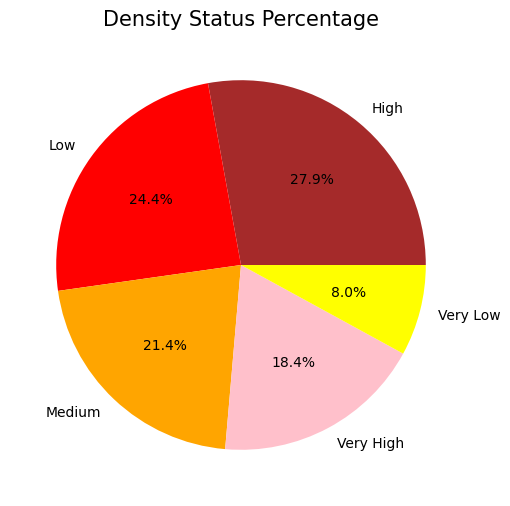

In [41]:
plt.subplots(figsize=(6, 6))
ax = data.groupby(['Density Status']).size().plot.pie(autopct='%0.1f%%', colors=['brown', 'red', 'orange', 'pink', 'yellow'])
ax.set_ylabel(None)
plt.title('Density Status Percentage', fontdict = {'fontname':'Comic Sans MS', 'fontsize' :15})

plt.show()

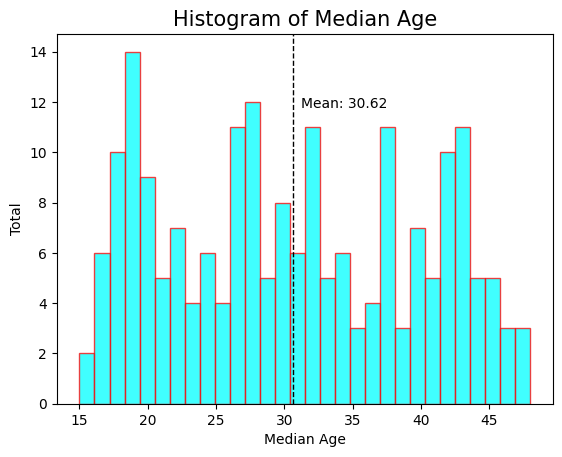

In [42]:
plt.hist(data['Med. Age'], bins=30,color='cyan', edgecolor = 'red',alpha=0.75)
plt.axvline(data['Med. Age'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlabel('Median Age', size=10)
plt.ylabel('Total', size=10)
plt.title('Histogram of Median Age', fontdict = {'fontname':'Comic Sans MS', 'fontsize' :15})
min_ylim, max_ylim = plt.ylim()
plt.text(data['Med. Age'].mean()*1.02, max_ylim*0.8, 'Mean: {:.2f}'.format(data['Med. Age'].mean()))

plt.show()